In [5]:
# handy imports to have
%matplotlib inline
from sympy import symbols, Eq, solve
import math
from itertools import combinations_with_replacement , permutations, combinations, count, chain
import numpy as np
import time
import functools
from tqdm.notebook import trange, tqdm
import ipywidgets as widgets
import matplotlib.pyplot as plt
from collections import Counter, deque
import more_itertools as mit
import string
import ast
import networkx as nx

In [96]:
# sample input
scan = [['AA', 0, ['DD', 'II', 'BB']], ['BB', 13, ['CC', 'AA']], ['CC', 2, ['DD', 'BB']], ['DD', 20, ['CC', 'AA', 'EE']], ['EE', 3, ['FF', 'DD']], ['FF', 0, ['EE', 'GG']], ['GG', 0, ['FF', 'HH']], ['HH', 22, ['GG']], ['II', 0, ['AA', 'JJ']], ['JJ', 21, ['II']]]

In [117]:
# problem input
scan = [['GV', 23, [ 'WO']], ['TS', 0, [ 'IG', 'TX']], ['UC', 0, [ 'XJ', 'VZ']], ['TJ', 0, [ 'GJ', 'YV']], ['KF', 0, [ 'QY', 'VP']], ['PO', 0, [ 'YF', 'VP']], ['CV', 0, [ 'VB', 'QK']], ['NK', 6, [ 'MI', 'QY', 'DO', 'QJ', 'YH']], ['IG', 4, [ 'MI', 'FP', 'OP', 'UV', 'TS']], ['KN', 0, [ 'RF', 'CY']], ['KR', 0, [ 'VP', 'DI']], ['VZ', 19, [ 'UC']], ['MW', 0, [ 'UZ', 'VB']], ['LJ', 25, [ 'XJ', 'LI']], ['DI', 0, [ 'KR', 'AA']], ['TO', 12, [ 'TG', 'PB', 'BZ']], ['CG', 0, [ 'VP', 'TX']], ['GJ', 0, [ 'QL', 'TJ']], ['UZ', 0, [ 'MW', 'VP']], ['RF', 16, [ 'RD', 'KN', 'AU']], ['CY', 0, [ 'KN', 'YV']], ['AA', 0, [ 'UV', 'VS', 'NB', 'XO', 'DI']], ['YV', 11, [ 'CY', 'PW', 'TJ']], ['VS', 0, [ 'QK', 'AA']], ['TX', 14, [ 'RM', 'CG', 'TS', 'DM', 'YH']], ['SB', 0, [ 'YF', 'BZ']], ['QY', 0, [ 'NK', 'KF']], ['PB', 0, [ 'HP', 'TO']], ['YF', 20, [ 'DM', 'SB', 'PO']], ['TG', 0, [ 'RM', 'TO']], ['UV', 0, [ 'IG', 'AA']], ['XJ', 0, [ 'LJ', 'UC']], ['DM', 0, [ 'YF', 'TX']], ['PW', 0, [ 'YV', 'LI']], ['RD', 0, [ 'QL', 'RF']], ['OM', 0, [ 'QK', 'OP']], ['RM', 0, [ 'TX', 'TG']], ['SH', 0, [ 'AU', 'HP']], ['LI', 0, [ 'PW', 'LJ']], ['FP', 0, [ 'IG', 'VB']], ['BZ', 0, [ 'SB', 'TO']], ['DO', 0, [ 'NK', 'VB']], ['WO', 0, [ 'QK', 'GV']], ['MI', 0, [ 'IG', 'NK']], ['QK', 10, [ 'VS', 'OM', 'WO', 'CV']], ['OP', 0, [ 'IG', 'OM']], ['AU', 0, [ 'SH', 'RF']], ['QJ', 0, [ 'NK', 'XO']], ['VP', 8, [ 'PO', 'CG', 'KF', 'KR', 'UZ']], ['HP', 17, [ 'SH', 'PB']], ['XO', 0, [ 'QJ', 'AA']], ['QL', 15, [ 'RD', 'GJ']], ['NB', 0, [ 'VB', 'AA']], ['VB', 7, [ 'DO', 'CV', 'MW', 'NB', 'FP']], ['YH', 0, [ 'NK', 'TX']]]

In [3]:
for s in scan:
    print(s)

['AA', 0, ['DD', 'II', 'BB']]
['BB', 13, ['CC', 'AA']]
['CC', 2, ['DD', 'BB']]
['DD', 20, ['CC', 'AA', 'EE']]
['EE', 3, ['FF', 'DD']]
['FF', 0, ['EE', 'GG']]
['GG', 0, ['FF', 'HH']]
['HH', 22, ['GG']]
['II', 0, ['AA', 'JJ']]
['JJ', 21, ['II']]


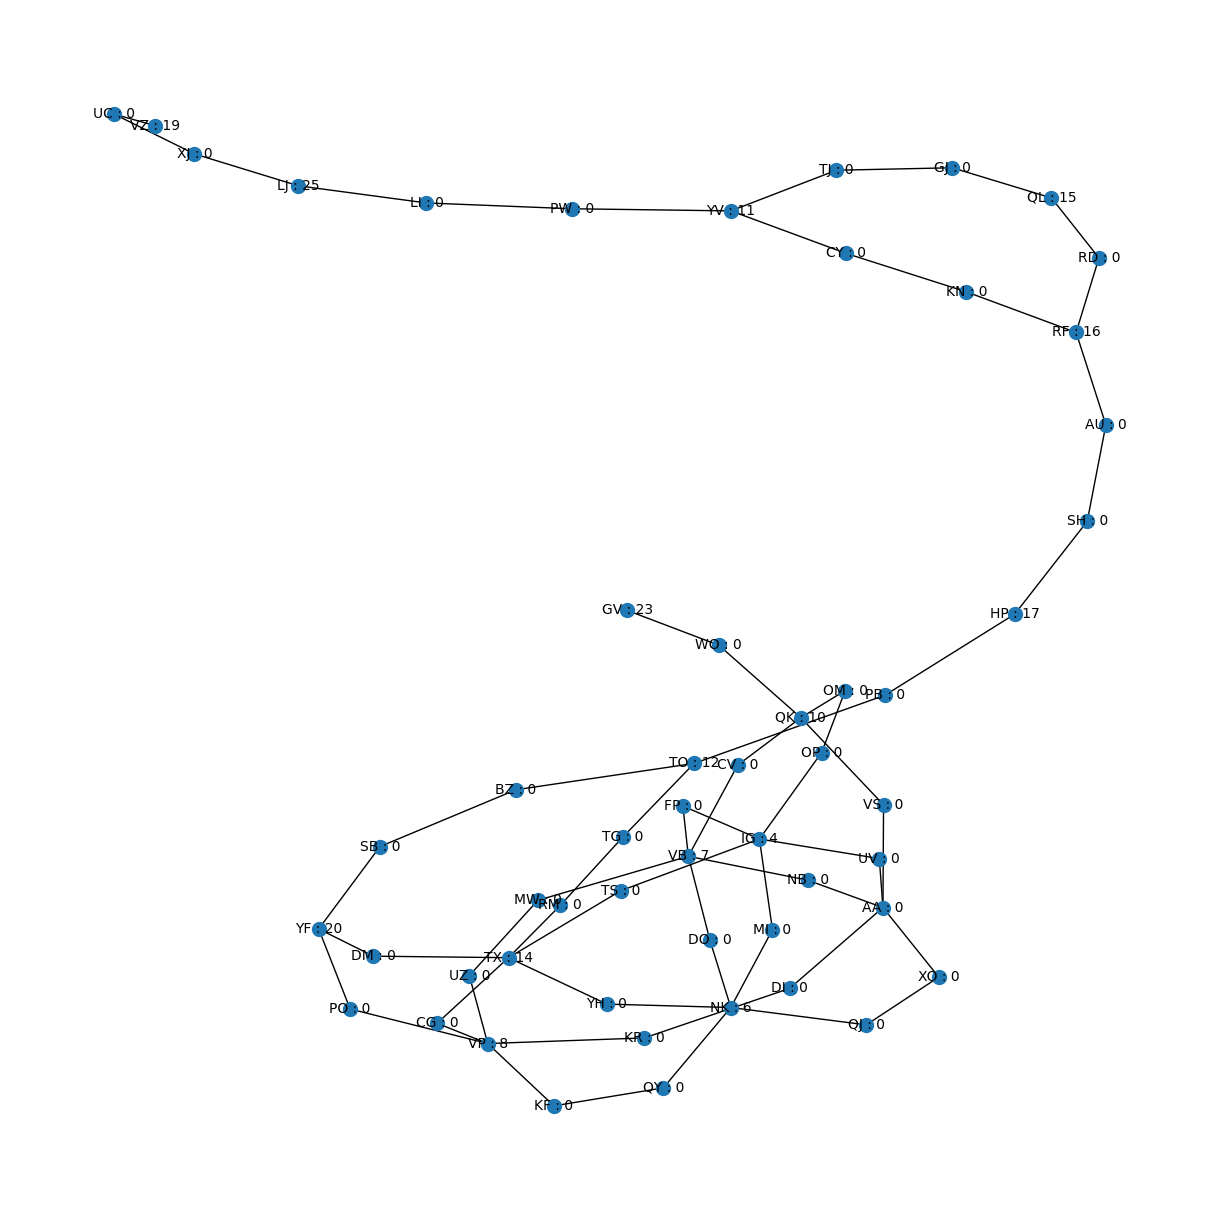

In [138]:
tunnels = nx.Graph()

for name, pressure, conns in scan:
    tunnels.add_node(name, steam=pressure)
    for e in conns:
        tunnels.add_edge(name, e)
        
labels = nx.get_node_attributes(tunnels, 'steam')
for l, s in labels.items():
    labels[l] = l + ' : ' + str(s)

plt.figure(3, figsize=(12,12))
nx.draw(tunnels, with_labels=True, labels=labels, node_size=100, font_size=10)
plt.show()

In [92]:
# code from when I was testing
valve_pressures['DD'] = 0
nx.set_node_attributes(tunnels, valve_pressures, 'steam')

In [94]:
# code from when I was testing
valve_pressures['DD'] = 0
valve_pressures['BB'] = 0
nx.set_node_attributes(tunnels, valve_pressures, 'steam')

In [ ]:
# re-initialize the graph
for name, pressure, conns in scan:
    tunnels.add_node(name, steam=pressure)
    for e in conns:
        tunnels.add_edge(name, e)


paths = dict(nx.all_pairs_shortest_path(tunnels))
valve_pressures = nx.get_node_attributes(tunnels, 'steam')



curr = 'AA'
total_released = 0
total_venting = 0

minute = 1

time_limit = 31

nxt = None

while minute < time_limit:

    
    if nxt != None:
        if curr == nxt.name or valve_pressures[curr] > 0:
            
            print(minute, 'Opening', curr, total_venting, '->', total_venting+valve_pressures[curr])
            total_released += total_venting
            total_venting += valve_pressures[curr]
            valve_pressures[curr] = 0
            nx.set_node_attributes(tunnels, valve_pressures, 'steam')
            minute += 1

            if minute >= time_limit:
                break
        else:
            print('AT ', curr)
        
        
    nxt = None
    
    for k in valve_pressures.keys():
        route = paths[curr][k][1:]
        dist = len(route)
        press = valve_pressures[k]
        if press:
            print(k, 'has', press, 'steam and is', dist, 'away from AA, with path:', route)
            if nxt == None:
                nxt = next_destination(k, press, dist, route)
            elif nxt.dist == dist:
                if press > nxt.press:
                    nxt = next_destination(k, press, dist, route)
            elif nxt.dist == min(nxt.dist, dist):
                if press > (dist+1 - nxt.dist) * nxt.press:
                    nxt = next_destination(k, press, dist, route)
            else:
                if (nxt.dist+1-dist)*press > nxt.press:
                    nxt = next_destination(k, press, dist, route)
    print('\n\n')
    total_released += total_venting
    if nxt != None:
        print(minute, 'going to', nxt.name, 'at', nxt.route[0], 'venting', total_venting, 'vented', total_released )
    else:
        print("All valves opened! Terminal math ...")
        min_left = time_limit - minute
        total_released += total_venting * min_left
        break
    
    curr = nxt.route[0]
    
    
    minute += 1
    
    
print(total_released)

    
# 1501 too low


In [105]:
class next_destination:
    
    def __init__(self, name, pressure, distance, route):
        self.name = name
        self.press = pressure
        self.dist = distance
        self.route = route
        
    def __str__(self):
        return self.name + ': ' + str(self.press) + 'ps ' + str(self.dist) + ' away'

In [169]:
def get_distance(start, end):
    return len(paths[start][end][1:])